# Data Preparation
The raw data collected from the Arquivo.pt API should be cleaned and prepared for the further data analysis and search system implementarion in posterior stages of the project. Therefore all the data, especially the textual one, should be normalized to fit better search criteria.

Firstly we import all of the relevant packages for the data cleanup.

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re



### Preliminary Data Analysis:
We start by examining the data collected to better grasp it's extent and content.

In [405]:
df = pd.read_json("data/psd.json")
df.shape

(30561, 5)

In [406]:
df.columns

Index(['date', 'link', 'contentLength', 'type', 'text'], dtype='object')

#### Data Preview:

In [407]:
df.head()

,date,link,contentLength,type,text
0,2017-02-22 11:40:00,https://arquivo.pt/wayback/20170222114000/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
1,2017-02-22 12:27:40,https://arquivo.pt/wayback/20170222122740/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
2,2017-02-22 12:34:39,https://arquivo.pt/wayback/20170222123439/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
3,2017-02-22 12:52:14,https://arquivo.pt/wayback/20170222125214/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
4,2017-02-22 12:04:00,https://arquivo.pt/wayback/20170222120400/http...,2333,text/html,PSD - Partido Social Democrata Toggle navigati...


### Cleaning Unrecognized Characters in Data:

Our text field has multiple unrecognized characters and escape sequences that are unuseful so we removed them.

In [408]:
df["text"]=pd.Series(df['text'], dtype="string")

df["text"]=df["text"].str.replace("[\n\t\r]","",regex=True)
df["text"]=df["text"].str.replace(" +"," ",regex=True)

df

,date,link,contentLength,type,text
0,2017-02-22 11:40:00,https://arquivo.pt/wayback/20170222114000/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
1,2017-02-22 12:27:40,https://arquivo.pt/wayback/20170222122740/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
2,2017-02-22 12:34:39,https://arquivo.pt/wayback/20170222123439/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
3,2017-02-22 12:52:14,https://arquivo.pt/wayback/20170222125214/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
4,2017-02-22 12:04:00,https://arquivo.pt/wayback/20170222120400/http...,2333,text/html,PSD - Partido Social Democrata Toggle navigati...
...,...,...,...,...,...
30556,2020-12-26 20:48:35,https://arquivo.pt/wayback/20201226204835/http...,2,text/html,[]
30557,2020-12-27 20:33:45,https://arquivo.pt/wayback/20201227203345/http...,1594,text/plain,## robots.txt## This file is to prevent the cr...
30558,2020-12-29 20:58:54,https://arquivo.pt/wayback/20201229205854/http...,2302,text/html,"{""page"":1,""pages"":232,""items"":[{""id"":""72157717..."
30559,2020-12-30 20:41:46,https://arquivo.pt/wayback/20201230204146/http...,1851,text/html,Primeiro Portugal | PSD menu Início Presidente...


### Analysing Null Values:
Since our dataset is collected using the Arquivo.pt API, no null values are considered globally.

In [409]:
df.isnull().sum().sum()

0

#### Checking Empty Text Fields:

In [410]:
df[df["text"]==""]

,date,link,contentLength,type,text
2044,2017-03-02 08:43:19,https://arquivo.pt/wayback/20170302084319/http...,5,application/pdf,
2611,2017-03-02 07:00:37,https://arquivo.pt/wayback/20170302070037/http...,4,application/pdf,
2825,2017-03-02 02:58:08,https://arquivo.pt/wayback/20170302025808/http...,5,application/pdf,
2916,2017-03-02 03:29:59,https://arquivo.pt/wayback/20170302032959/http...,1,application/pdf,
3269,2017-03-02 02:58:22,https://arquivo.pt/wayback/20170302025822/http...,5,application/pdf,
...,...,...,...,...,...
30363,2020-12-09 21:00:13,https://arquivo.pt/wayback/20201209210013/http...,0,text/html,
30502,2020-12-30 20:41:57,https://arquivo.pt/wayback/20201230204157/http...,0,text/html,
30517,2020-12-20 20:47:04,https://arquivo.pt/wayback/20201220204704/http...,0,text/html,
30539,2020-12-10 20:59:14,https://arquivo.pt/wayback/20201210205914/http...,0,text/html,


#### Replacing Empty Text With Null Values:

In [411]:
#df = df.replace(r'^\s*$', np.nan, regex=True)
df

,date,link,contentLength,type,text
0,2017-02-22 11:40:00,https://arquivo.pt/wayback/20170222114000/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
1,2017-02-22 12:27:40,https://arquivo.pt/wayback/20170222122740/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
2,2017-02-22 12:34:39,https://arquivo.pt/wayback/20170222123439/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
3,2017-02-22 12:52:14,https://arquivo.pt/wayback/20170222125214/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
4,2017-02-22 12:04:00,https://arquivo.pt/wayback/20170222120400/http...,2333,text/html,PSD - Partido Social Democrata Toggle navigati...
...,...,...,...,...,...
30556,2020-12-26 20:48:35,https://arquivo.pt/wayback/20201226204835/http...,2,text/html,[]
30557,2020-12-27 20:33:45,https://arquivo.pt/wayback/20201227203345/http...,1594,text/plain,## robots.txt## This file is to prevent the cr...
30558,2020-12-29 20:58:54,https://arquivo.pt/wayback/20201229205854/http...,2302,text/html,"{""page"":1,""pages"":232,""items"":[{""id"":""72157717..."
30559,2020-12-30 20:41:46,https://arquivo.pt/wayback/20201230204146/http...,1851,text/html,Primeiro Portugal | PSD menu Início Presidente...


#### Number of Missing Data:

In [412]:
total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Number', 'Percent'])
missing_data

,Number,Percent
date,0,0.0
link,0,0.0
contentLength,0,0.0
type,0,0.0
text,0,0.0


#### Missing Text per Website Type:

Series([], Name: type, dtype: int64)


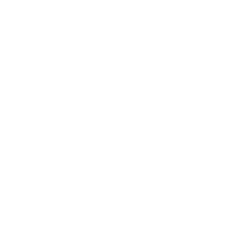

In [413]:
missing_values = df.loc[df['text'].isnull(), 'type']
missing_values_labels = missing_values.value_counts().keys().to_list()
print(missing_values.value_counts())

fig1, ax1 = plt.subplots()
ax1.pie(missing_values.value_counts(),labels=missing_values_labels,autopct='%.1f%%')
plt.show()

#### Removing Missing Text Lines:

In [414]:
df.dropna()

,date,link,contentLength,type,text
0,2017-02-22 11:40:00,https://arquivo.pt/wayback/20170222114000/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
1,2017-02-22 12:27:40,https://arquivo.pt/wayback/20170222122740/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
2,2017-02-22 12:34:39,https://arquivo.pt/wayback/20170222123439/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
3,2017-02-22 12:52:14,https://arquivo.pt/wayback/20170222125214/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
4,2017-02-22 12:04:00,https://arquivo.pt/wayback/20170222120400/http...,2333,text/html,PSD - Partido Social Democrata Toggle navigati...
...,...,...,...,...,...
30556,2020-12-26 20:48:35,https://arquivo.pt/wayback/20201226204835/http...,2,text/html,[]
30557,2020-12-27 20:33:45,https://arquivo.pt/wayback/20201227203345/http...,1594,text/plain,## robots.txt## This file is to prevent the cr...
30558,2020-12-29 20:58:54,https://arquivo.pt/wayback/20201229205854/http...,2302,text/html,"{""page"":1,""pages"":232,""items"":[{""id"":""72157717..."
30559,2020-12-30 20:41:46,https://arquivo.pt/wayback/20201230204146/http...,1851,text/html,Primeiro Portugal | PSD menu Início Presidente...


### Remove Duplicates:
Some of the websites fetched are the same instances of the same webpage but colleted in a different timestamp, so it's unnecessary to have the same text content repeated in the dataset, given that the search system will only need to search the text.

In [415]:
df.drop_duplicates(subset="text",
                     keep="first", inplace=True)
df

,date,link,contentLength,type,text
0,2017-02-22 11:40:00,https://arquivo.pt/wayback/20170222114000/http...,7597,text/html,PSD - Partido Social Democrata Toggle navigati...
4,2017-02-22 12:04:00,https://arquivo.pt/wayback/20170222120400/http...,2333,text/html,PSD - Partido Social Democrata Toggle navigati...
8,2017-02-22 12:24:52,https://arquivo.pt/wayback/20170222122452/http...,412642,application/pdf,Por um Portugal amigo das criança...
14,2017-02-22 13:06:16,https://arquivo.pt/wayback/20170222130616/http...,3044,text/html,PSD - Partido Social Democrata Toggle navigati...
24,2017-02-22 12:31:59,https://arquivo.pt/wayback/20170222123159/http...,5403,text/html,PSD - Partido Social Democrata Toggle navigati...
...,...,...,...,...,...
30464,2020-12-13 20:58:41,https://arquivo.pt/wayback/20201213205841/http...,2565,text/html,| PSD menu Início Presidente Presidente Discur...
30486,2020-12-12 19:47:36,https://arquivo.pt/wayback/20201212194736/http...,2578,text/html,| PSD menu Início Presidente Presidente Discur...
30496,2020-12-23 20:45:19,https://arquivo.pt/wayback/20201223204519/http...,2249,text/html,| PSD menu Início Presidente Presidente Discur...
30521,2020-12-22 20:59:07,https://arquivo.pt/wayback/20201222205907/http...,2964,text/html,| PSD menu Início Presidente Presidente Discur...


In [416]:

stop = stopwords.words('portuguese') + ["ser","quer","se","sobre","toda","assim","sendo"]

wordcloud_text=df["text"].str.replace("[$&+:;“”=?@#|'<>.^*()%!,\"\/]"," ",regex=True)
wordcloud_text=wordcloud_text.str.replace("\d","",regex=True)
wordcloud_text=wordcloud_text.str.replace(" +"," ",regex=True)


df_without_stopwords=" ".join(wordcloud_text)

df_without_stopwords=' '.join([word.lower() for word in df_without_stopwords.split(" ") if word.lower() not in (stop)])

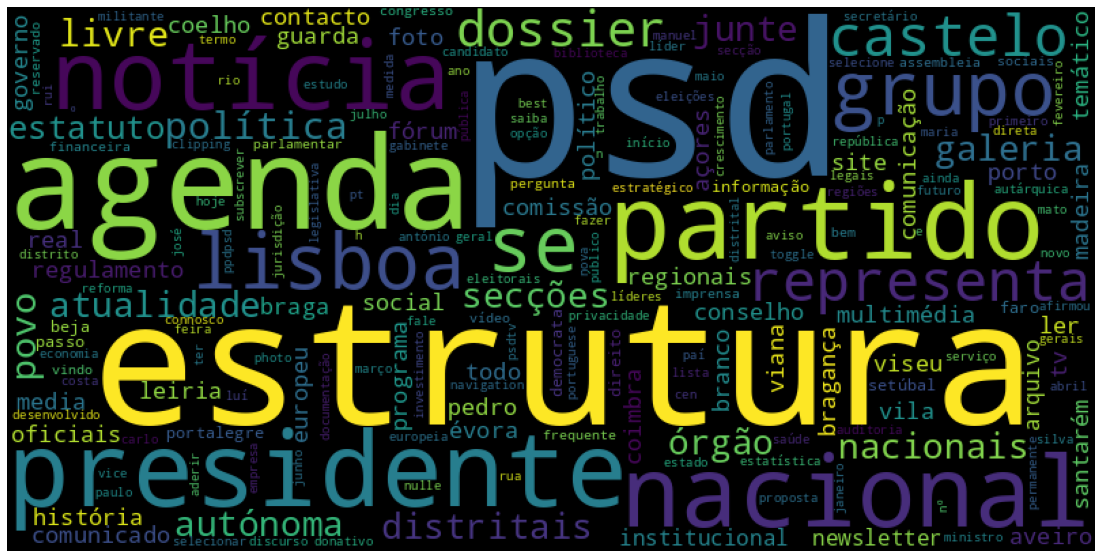

In [418]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400,collocations=False).generate(df_without_stopwords)

#
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()